## Observations and Insights 

Aaron Lewis
Capomulin and Ramicane seen to have the same overall effect. There distribution were clearly significantly lower than Infubinol and Ceftamin.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
pharma_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
pharma_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
pharma_data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
# Checking the number of mice in the DataFrame.
mice_count = len(pharma_data_complete["Mouse ID"].unique())
print(f"There are {mice_count} mice in the DataFrame.")

There are 249 mice in the DataFrame.


In [7]:
# Checking for any missing values in the DataFrame.
pharma_data_complete.isnull().sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [8]:
# Getting the number of duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#pharma_data_cleaned = pharma_data_complete.copy()
duplicate_count = pharma_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False).sum()
print(f"There are a total {duplicate_count} duplicates that show up for Mouse ID and Timepoint.")

There are a total 10 duplicates that show up for Mouse ID and Timepoint.


In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get all the data for the duplicate mouse ID.
pharma_data_complete.loc[pharma_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False), : ]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#pharma_data_cleaned.loc[pharma_data_cleaned.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False), : ]
#pharma_data_complete.loc[~pharma_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False), : ].shape
pharma_data_cleaned = pharma_data_complete.loc[~pharma_data_complete.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False), : ].reset_index(drop = True)
pharma_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
pharma_data_cleaned.shape

(1883, 8)

In [12]:
# Checking the number of mice in the clean DataFrame.
mice_count_cleaned = len(pharma_data_cleaned["Mouse ID"].unique())
print(f"There are {mice_count_cleaned} mice in the cleaned DataFrame.")

There are 249 mice in the cleaned DataFrame.


## Summary Statistics

In [13]:
drug_regime_list = [drug for drug in pharma_data_cleaned["Drug Regimen"].sort_values().unique()]
#drug_regime_list = drug_regime.sort()
drug_regime_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_regimen_dict = dict()
the_means_list = []
the_median_list = []
the_var_list = []
the_std_list = []
the_sem_list = []

#Calculate the Summary Data.
for drug in drug_regime_list:
    drug_mean = pharma_data_cleaned[pharma_data_cleaned["Drug Regimen"] == drug]["Tumor Volume (mm3)"].mean()
    drug_median = pharma_data_cleaned[pharma_data_cleaned["Drug Regimen"] == drug]["Tumor Volume (mm3)"].median()
    drug_var = pharma_data_cleaned[pharma_data_cleaned["Drug Regimen"] == drug]["Tumor Volume (mm3)"].var()
    drug_std = pharma_data_cleaned[pharma_data_cleaned["Drug Regimen"] == drug]["Tumor Volume (mm3)"].std()
    drug_sem = pharma_data_cleaned[pharma_data_cleaned["Drug Regimen"] == drug]["Tumor Volume (mm3)"].sem()
    
    # append all the lists.
    the_means_list.append(drug_mean)
    the_median_list.append(drug_median)
    the_var_list.append(drug_var)
    the_std_list.append(drug_std)
    the_sem_list.append(drug_sem)
    
#Create the summary dictionary.
drug_regimen_dict["Drug Regimen"] = drug_regime_list
drug_regimen_dict["TumorMean"] = the_means_list
drug_regimen_dict["TumorMedian"] = the_median_list
drug_regimen_dict["TumorVar"] = the_var_list
drug_regimen_dict["TumorStd"] = the_std_list
drug_regimen_dict["TumorSEM"] = the_sem_list

#Create the DataFrame.
drug_regimen_dict_df = pd.DataFrame(drug_regimen_dict)
drug_regimen_dict_df.sort_values(by = "Drug Regimen")

,Drug Regimen,TumorMean,TumorMedian,TumorVar,TumorStd,TumorSEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

#Group by Drug Regimen:
grp_drug_regimen = pharma_data_cleaned.groupby(["Drug Regimen"])

#Summary
grp_drug_regimen_summary = grp_drug_regimen.agg(TumorMean = ("Tumor Volume (mm3)", "mean"),TumorMedian = ("Tumor Volume (mm3)", "median"),TumorVar = ("Tumor Volume (mm3)", "var"),TumorStd = ("Tumor Volume (mm3)", "std"),TumorSEM = ("Tumor Volume (mm3)", "sem")).reset_index()
grp_drug_regimen_summary

,Drug Regimen,TumorMean,TumorMedian,TumorVar,TumorStd,TumorSEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Plots

In [16]:
pharma_data_cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [17]:
pharma_data_cleaned.shape

(1883, 8)

In [18]:
# Determine the number of mice for each treatment at every timepoint.
grp_treatment_timepoint = pharma_data_cleaned.groupby(["Drug Regimen", "Timepoint"])[["Mouse ID"]].count()
grp_treatment_timepoint.rename(columns = {'Mouse ID' : 'Counts'}, inplace = True)
grp_treatment_timepoint

Counts
Drug Regimen Timepoint        
Capomulin    0              25
             5              25
             10             25
             15             24
             20             23
...                        ...
Zoniferol    25             16
             30             15
             35             14
             40             14
             45             14

[100 rows x 1 columns]

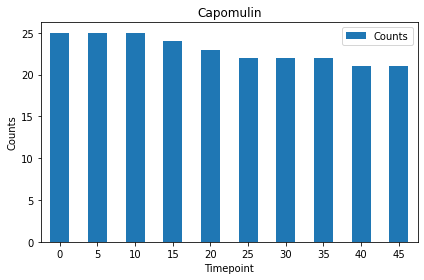

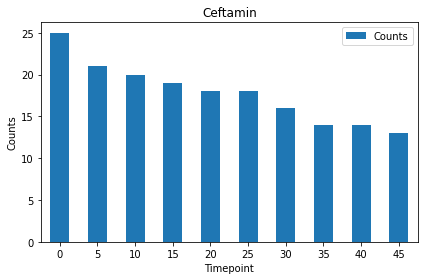

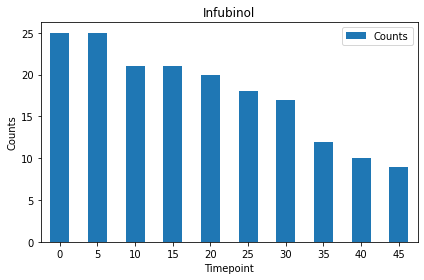

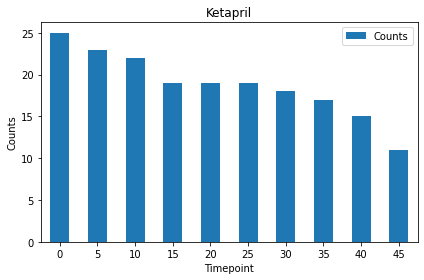

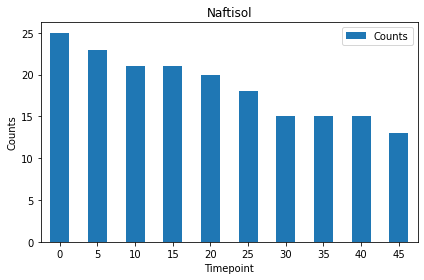

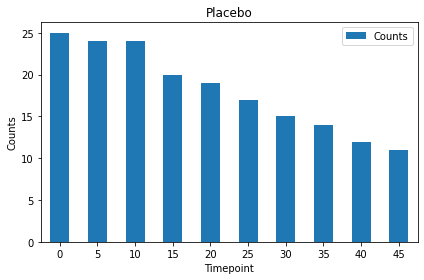

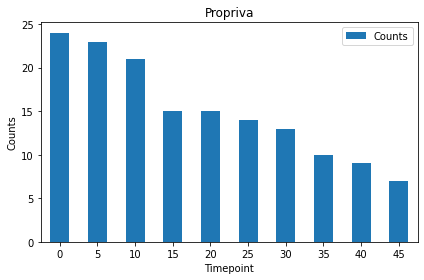

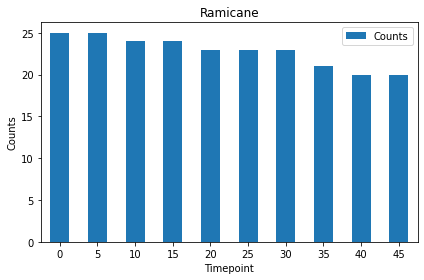

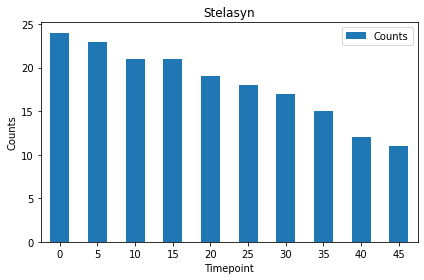

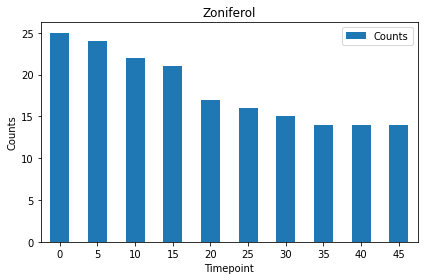

In [19]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.


# Define the canvas size
#fig = plt.figure(figsize = (40, 10))
#fig.set_size_inches(5,15)
#nrows = 2
#ncols = int(len(drug_regime_list)/nrows)
#fig, axes = plt.subplots(ncols)
#axes = np.ravel(axes2d)
# Create the figure.
#fig1 , ax_plots = plt.subplots(2,5)
#fig1.suptitle("TREATMENTS")

# Subplots:
for treatment in drug_regime_list[0:]:
    data_df = grp_treatment_timepoint.loc[treatment].reset_index()
    data_df.plot(kind = "bar", x = "Timepoint", y = "Counts", title= treatment, rot = "horizontal",use_index = True,)
    plt.ylabel("Counts")
    plt.tight_layout()
    plt.show();
    



In [20]:
data_df = grp_treatment_timepoint.loc["Capomulin"].reset_index()
data_df

,Timepoint,Counts
0,0,25
1,5,25
2,10,25
3,15,24
4,20,23
5,25,22
6,30,22
7,35,22
8,40,21
9,45,21


In [21]:
data_df = grp_treatment_timepoint.loc[treatment].reset_index()
data_df

,Timepoint,Counts
0,0,25
1,5,24
2,10,22
3,15,21
4,20,17
5,25,16
6,30,15
7,35,14
8,40,14
9,45,14


In [23]:
drug_regime_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

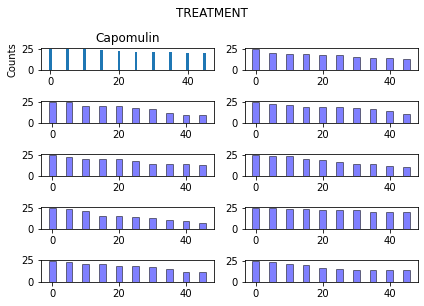

In [24]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#
x_values = dict()
y_values = dict()
for treatment in drug_regime_list[0:]:
    data_df = grp_treatment_timepoint.loc[treatment].reset_index()

    x_values[treatment] = data_df["Timepoint"]
    y_values[treatment] = data_df["Counts"]
    #i += 1
# Subplots:
fig1, ax_plots = plt.subplots(5,2)
fig1.suptitle("TREATMENT", y = 1.05)
ax_plots[0, 0].bar(x_values['Capomulin'], y_values['Capomulin']); ax_plots[0, 0].set_title("Capomulin"); ax_plots[0, 0].set_ylabel("Counts")
ax_plots[0, 1].bar(x_values['Ceftamin'], y_values['Ceftamin'], label = 'Ceftamin', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[1, 0].bar(x_values['Infubinol'], y_values['Infubinol'], label = 'Infubinol', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[1, 1].bar(x_values['Ketapril'], y_values['Ketapril'], label = 'Ketapril', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[2, 0].bar(x_values['Naftisol'], y_values['Naftisol'], label = 'Naftisol', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[2, 1].bar(x_values['Placebo'], y_values['Placebo'], label = 'Placebo', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[3, 0].bar(x_values['Propriva'], y_values['Propriva'], label = 'Propriva', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[3, 1].bar(x_values['Ramicane'], y_values['Ramicane'], label = 'Ramicane', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[4, 0].bar(x_values['Stelasyn'], y_values['Stelasyn'], label = 'Stelasyn', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
ax_plots[4, 1].bar(x_values['Zoniferol'], y_values['Zoniferol'], label = 'Zoniferol', color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
#plt.xticks(ticks = x)
#plt.xlabel("Timepoint")
#plt.ylabel("Counts")
#plt.title(treatment)
fig1.tight_layout()
plt.show();
    
    #ax_plot.bar( x,y, label = treatment, color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k")
    #plt.bar( x,y, label = treatment, color = "b", alpha = 0.5, align="center", width = 2, edgecolor = "k", ax = axes[i])
    #plt.xticks(ticks = x)
    #plt.xlabel("Timepoint")
    #plt.ylabel("Counts")
    #plt.title(treatment)
    #fig2.tight    #plt.tight_layout()
    #plt.show();
    


## Pie Plots

In [25]:

grp_treatment_gender = pharma_data_cleaned.copy()
grp_treatment_gender.rename(columns = {'Mouse ID' : 'Mouse_ID',
                                    'Drug Regimen' : 'Drug_Regimen',
                                    'Tumor Volume (mm3)' : 'Tumor_Volume',
                                'Weight (g)' : 'Weight'}, inplace = True)
df1 = grp_treatment_gender.set_index(['Drug_Regimen', "Sex"]).sort_index()
df1.head()

Mouse_ID  Age_months  Weight  Timepoint  Tumor_Volume  \
Drug_Regimen Sex                                                            
Capomulin    Female     s185           3      17          0     45.000000   
             Female     s185           3      17          5     43.878496   
             Female     s185           3      17         10     37.614948   
             Female     s185           3      17         15     38.177232   
             Female     s185           3      17         20     36.866876   

                     Metastatic Sites  
Drug_Regimen Sex                       
Capomulin    Female                 0  
             Female                 0  
             Female                 0  
             Female                 0  
             Female                 0

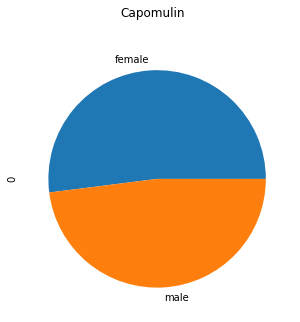

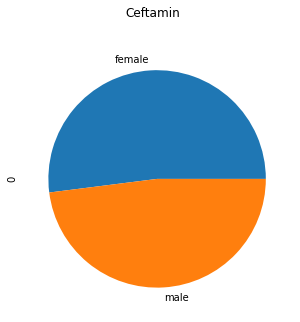

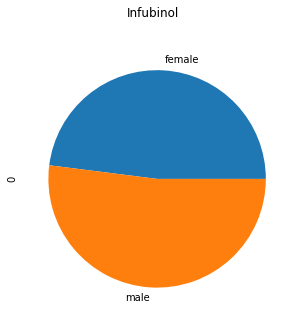

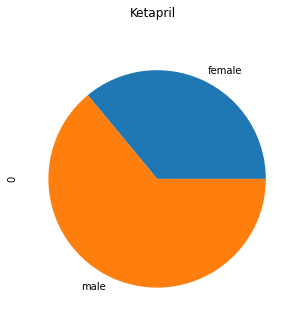

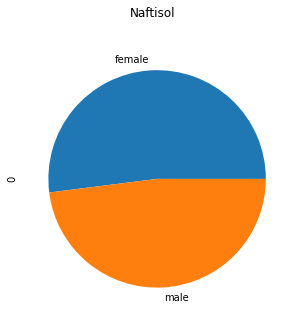

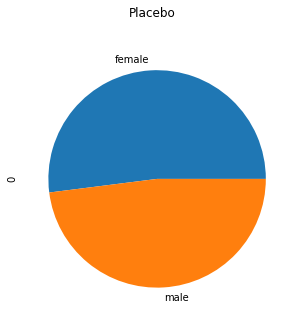

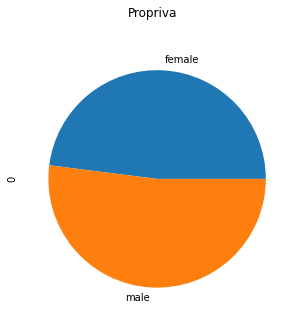

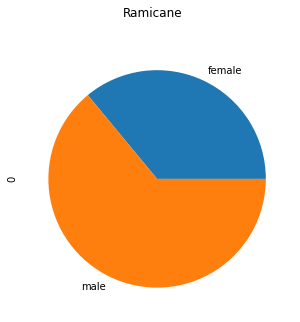

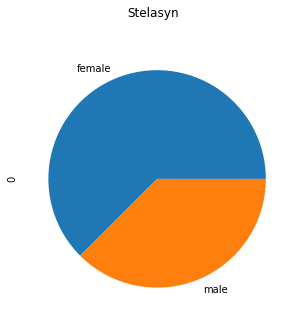

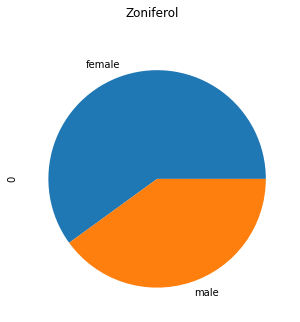

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#fig, axes = plt.subplots(ncols = 2)
for treatment in drug_regime_list[0:]:
    female_count = len(df1.loc[treatment, "Female"].Mouse_ID.unique())
    male_count = len(df1.loc[treatment, "Male"].Mouse_ID.unique())
    
    slices = [female_count, male_count]
    labels = ["female","male"]
    colors = ["r", "b"]
    pie_df =pd.DataFrame(slices, index = labels)
    pie_df.plot(kind="pie", subplots=True, figsize=(5,5), title = treatment, legend = False)

    #pie_df.plot.pie(x='count', figsize=(5, 5))


In [27]:
#fig_gender = plt.figure(3)
#fig_gender.suptitle("Gender Participation for each Treatment");

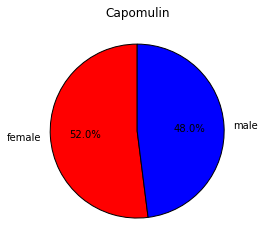

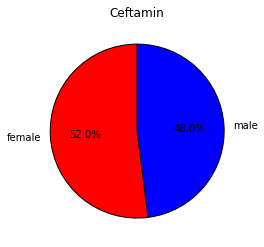

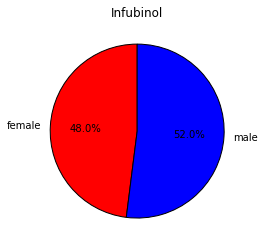

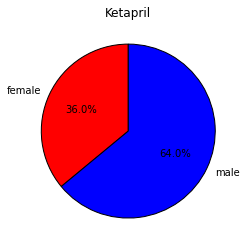

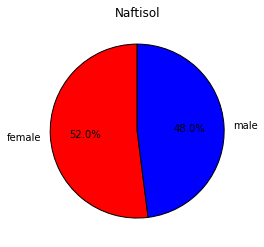

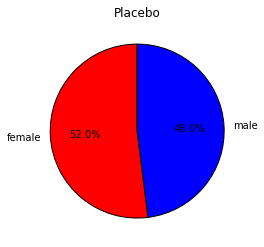

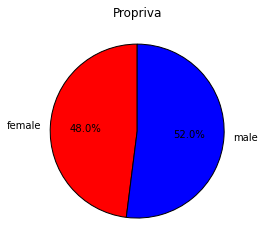

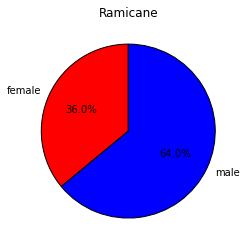

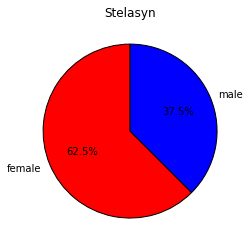

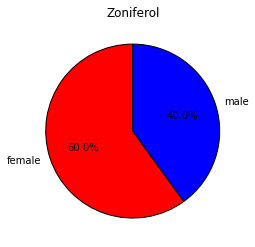

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#k = 0
for treatment in drug_regime_list[0:]:
    female_count = len(df1.loc[treatment, "Female"].Mouse_ID.unique())
    male_count = len(df1.loc[treatment, "Male"].Mouse_ID.unique())

    slices = [female_count, male_count]
    labels = ["female","male"]
    colors = ["r", "b"]
    
    #k += 1
#as_plot = fig_gender.add_subplot(5,2,k)
#as_plot.pie(slices, labels = labels, startangle=90, autopct="%1.1f%%", wedgeprops = {"edgecolor":"black","linewidth": 1 }, colors=colors)
    plt.pie(slices, labels = labels, startangle=90, autopct="%1.1f%%", wedgeprops = {"edgecolor":"black","linewidth": 1 }, colors=colors)
    plt.title(treatment)        
    plt.show()



## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
promising_list =['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
promising_bunch = pharma_data_cleaned.loc[((pharma_data_cleaned["Drug Regimen"] == 'Capomulin') | (pharma_data_cleaned["Drug Regimen"] == 'Ceftamin') | (pharma_data_cleaned["Drug Regimen"] == 'Infubinol') | (pharma_data_cleaned["Drug Regimen"] == 'Ramicane')), :]
promising_bunch = promising_bunch.rename(columns = {'Mouse ID' : 'Mouse_ID',
                                    'Drug Regimen' : 'Drug_Regimen',
                                    'Tumor Volume (mm3)' : 'Tumor_Volume',
                                'Weight (g)' : 'Weight'})
promising_bunch.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
id_treatment_df = promising_bunch.set_index('Mouse_ID')
id_treatment_df.head()

,Drug_Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
Mouse_ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
df2 = promising_bunch.set_index(['Mouse_ID', "Drug_Regimen"]).sort_index()
df2.head()

Sex  Age_months  Weight  Timepoint  Tumor_Volume  \
Mouse_ID Drug_Regimen                                                        
a203     Infubinol     Female          20      23          0     45.000000   
         Infubinol     Female          20      23          5     48.508468   
         Infubinol     Female          20      23         10     51.852437   
         Infubinol     Female          20      23         15     52.777870   
         Infubinol     Female          20      23         20     55.173336   

                       Metastatic Sites  
Mouse_ID Drug_Regimen                    
a203     Infubinol                    0  
         Infubinol                    0  
         Infubinol                    1  
         Infubinol                    1  
         Infubinol                    1

In [88]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
last_tumor_dict = dict()
final_tumor_list= []
treatment_list = []

for mouse in mouse_list:
    last_tumor_vol = df2.loc[mouse,"Tumor_Volume"][-1]
    final_tumor_list.append(last_tumor_vol)
    last_treatment = id_treatment_df.Drug_Regimen[mouse][-1]
    treatment_list.append(last_treatment)

#Create the summary dictionary.
last_tumor_dict["MouseID"] = mouse_list
last_tumor_dict["Treatment"] = treatment_list
last_tumor_dict["Final_Tumor"] = final_tumor_list


#Create the DataFrame.
last_tumor_dict_df = pd.DataFrame(last_tumor_dict)
last_tumor_dict_df.sort_values(by = "Treatment").reset_index(drop = True)
last_tumor_df = last_tumor_dict_df[~(last_tumor_dict_df.Treatment == "n")].sort_values(by = "Treatment").reset_index(drop = True)
last_tumor_df

,MouseID,Treatment,Final_Tumor
0,w150,Capomulin,39.952347
1,j119,Capomulin,38.125164
2,s710,Capomulin,40.728578
3,j246,Capomulin,38.753265
4,b128,Capomulin,38.982878
...,...,...,...
91,u196,Ramicane,40.667713
92,q597,Ramicane,45.220869
93,a444,Ramicane,43.047543
94,y449,Ramicane,44.183451


Text(0.5, 0, 'Treatment')

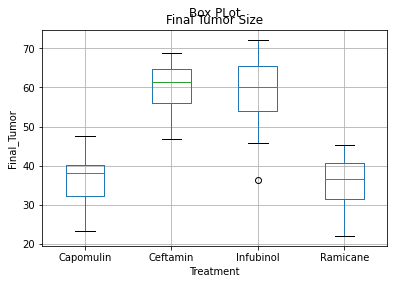

In [89]:
last_tumor_df.boxplot(by='Treatment', column = ['Final_Tumor'], grid=True)

plt.suptitle('Box PLot') #If you don't put this, Python will generate its own annoying title, "Boxplots Grouped by Sex"
plt.title('Final Tumor Size')
plt.ylabel('Final_Tumor')
plt.xlabel('Treatment')


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
